<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-280 Estadística Computacional I-2020 </h1>

<H3 align='center'> Tema 1 - Análisis Exploratorio de Datos  </H3>
<hr style="height:2px;border:none"/>

### **Formalidades**  
* Por favor trabaje individualmente. Es posible utilizar apuntes, libros, papers, ejemplos y cualquier otro material que desee de internet, pero debe ser usted quien desarrolle los ejercicios y comente los resultados en el notebook que entregará. Compórtese como si estuviese haciendo un certámen tradicional con acceso a apuntes.
* Puede utilizar Python o R. En ambos casos, no puede usar funciones estadísticas específicas, excepto aquellas correspondientes al cálculo de medidas de tendencia ó dispersión (media, desviación estándar, etc) y aquellas correspondientes al cálculo de probabilidades y percentiles sobre las distribuciones revisadas en clases (pnorm, qnorm, pt, qt), etc.
* Además del notebook, debe entregar un video explicando lo que hizo, paso a paso, como en los ejemplos entregados en AULA. El video puede ser subido a plataforma como GitHub, Youtube, Google Drive, ó Dropbox.

### **Entrega**
* **Formato**: Sus respuestas deben ser entregadas en forma de Jupyter notebook en conjunto con un video explicativo de 10 a 20 minutos
* **Plataforma**: subir a la entrega en **Aula** (para el vídeo se aconseja subir un link a plataforma auxiliar como Drive/Dropbox/Youtube). 
* **Fecha límite**: Viernes 11 Septiembre a las 23:59.

<hr style="height:2px;border:none"/>



* Estudiante: Josué Venegas Almonacid
* ROL: 201873534-5
* Video: https://youtu.be/leEuUIpVVUI
* Consideraciones: Por problemas con el comando wget, importé los documentos con pandas, por lo que para que el programa funcione sin problemas, se deben guardar los documentos de las muestras en la misma carpeta que el notebook

## Enunciado

Se está estudiando el desempeño productivo de una cierta maquinaria cada vez que es utilizada por una cierta empresa. En particular, se está estudiando y comparando tres diferentes condiciones $C$ sobre las cuales, la maquinaria se comporta de diferente manera. Para esta actividad usted tendrá disponibles datos, correspondiente a una muestra finita sobre cada una de las condiciones ($C_1, C_2, C_3$), indicando la medición del desempeño productivo (mayor indica un mejor desempeño).

Como información adicional se comenta lo siguiente: un desempeño aceptable, donde la maquinaria funciona de manera adecuada sin generar pérdidas a la empresa, corresponde a un valor cercano a 5. Mientras que un valor menor a 2 es un desempeño inaceptable que podría generar pérdidas a la empresa. Por otro lado, un valor mayor a 15 corresponde a un funcionamiento excelente que podría ayudar a acelerar la productividad y ahorrar dinero.


Los datos pueden ser descargados a través del siguiente link: __[muestraC1](https://raw.githubusercontent.com/FMena14/ML_usm/master/Estadisticia/data_T1/Muestra_C1.txt)__, __[muestraC2](https://raw.githubusercontent.com/FMena14/ML_usm/master/Estadisticia/data_T1/Muestra_C2.txt)__, __[muestraC3](https://raw.githubusercontent.com/FMena14/ML_usm/master/Estadisticia/data_T1/Muestra_C3.txt)__. Cada fila corresponde a un dato de la muestra.
*Para descargar directamente en Jupyter puede ejecutar*
```
!wget https://raw.githubusercontent.com/FMena14/ML_usm/master/Estadisticia/data_T1/Muestra_C1.txt
!wget https://raw.githubusercontent.com/FMena14/ML_usm/master/Estadisticia/data_T1/Muestra_C2.txt
!wget https://raw.githubusercontent.com/FMena14/ML_usm/master/Estadisticia/data_T1/Muestra_C3.txt
```

### Actividades
*Para los análisis cuantitativos recuerde utilizar una precisión decimal más que los datos*.

> a) [5 pts] Describa la población del fenómeno aleatorio de estudio, la variable asociada y las muestras a trabajar ¿Cuántos datos tiene cada muestra?

> b) [10 pts] Compare el desempeño sobre cada condición a través de los puntos centrales de tendencia (media y mediana) Comente con la información entregada en el enunciado acerca de los desempeños *aceptable*  ¿Qué información aporta el sesgo de los datos?

> c) [25 pts] Grafique el boxplot de cada muestra/condición y compare ¿Existe evidencia suficiente para concluir que la condición $C_3$ es mejor que las otras dos condiciones? Añada la información que se entregó sobre los desempeños inaceptables, aceptables y excelentes, ¿Qué se puede comentar al respecto de las condiciones?

> d) [15 pts] Analice  la dispersión de cada muestra/condición a través de la raiz cuadrada del promedio de las desviaciones cuadráticas respecto a $b$: $ \sqrt{\frac{1}{n} \sum_{i=1}^n (x_i -b)^2 } $. Utilice tres valores diferentes para $b$, por ejemplo las medidas de tendencia y/o valores relevantes del problema ¿Qué indica lo observado? Compare con lo analizado en c)

> e) [20 pts] En base a toda la información recolectada hasta este punto (medidas de tendencia, variabilidad y gráficos) ¿Cuál condición $C$ le recomendaría a la empresa utilizar? ¿Por qué? Apoye su elección en base a los tipos de desempeño.

> f) [15 pts] Realice un histograma, bajo diferentes valores de K (*bins*), de la muestra correspondiente a la condición escogida en el punto anterior. Apoye los análisis ya realizados hasta este punto con esta representación visual más detallada ¿Qué efecto produce y aporta al análisis la variación de *K*? Compare con el método de raiz y Sturges.

> g) [10 pts] Suponga que ahora llegan nuevos datos e información acerca de la condición $C_2$ y su muestra correspondiente, esto corresponde a 100 valores con un desempeño productivo menor a 2. ¿Qué indica esto acerca de la condición $C_2$, de su muestreo y de las conclusiones realizadas sobre esta condición?


In [1]:
#a) Población: Maquinaria de una empresa
#    Muestra: Subconjunto finito de la maquinaria de la empresa
#    Variable asociada: Desempeño productivo de las maquinarias
        
#Se importan librerias para cargar los archivos
import pandas as pd

muestraC1 = pd.read_csv("Muestra_C1.txt", header=None)
print(f"La muestra C1 tiene {muestraC1.shape[0]} datos")

muestraC2 = pd.read_csv("Muestra_C2.txt", header=None)
print(f"La muestra C2 tiene {muestraC2.shape[0]} datos")

muestraC3 = pd.read_csv("Muestra_C3.txt", header=None)
print(f"La muestra C3 tiene {muestraC3.shape[0]} datos")

La muestra C1 tiene 150 datos
La muestra C2 tiene 200 datos
La muestra C3 tiene 133 datos


In [2]:
#b)
    
#Se importan librerias para calcular lo solicitado
from numpy import mean, median

mediaC1 = round(float(mean(muestraC1)),4)
mediaC2 = round(float(mean(muestraC2)),4)
mediaC3 = round(float(mean(muestraC3)),4)

medianaC1 = round(float(median(muestraC1)),4)
medianaC2 = round(float(median(muestraC2)),4)
medianaC3 = round(float(median(muestraC3)),4)

sesgoC1 = round(float(mediaC1 - medianaC1),4)
sesgoC2 =  round(float(mediaC2 - medianaC2),4)
sesgoC3 =  round(float(mediaC3 - medianaC3),4)

#Se calcula lo solicitado
print(f"La media de la muestra C1 es {mediaC1}")
print(f"La media de la muestra C2 es {mediaC2}")
print(f"La media de la muestra C3 es {mediaC3}\n")


print(f"La mediana de la muestra C1 es {medianaC1}")
print(f"La mediana de la muestra C2 es {medianaC2}")
print(f"La mediana de la muestra C3 es {medianaC3}\n")

print(f"El sesgo de la muestra C1 es {sesgoC1}")
print(f"El sesgo de la muestra C2 es {sesgoC2}")
print(f"El sesgo de la muestra C3 es {sesgoC3}")


#Comente con la información entregada en el enunciado acerca de los desempeños aceptable ¿Qué información aporta el sesgo de los datos?
#Podemos observar que el orden descendente de las medias son C3, C1, C2, lo que mostraría un mejor desempeño de la maquinaria bajo la tercera condición. Con la mediana 
#sucede lo mismo, y como la mediana es robusta podemos inferir que los valores obtenidos en la media no fueron ocasionado por la incidencia accidental de valores extremos, 
#dándonos más certeza de los resultados. El sesgo nos permite validar o rechazar los datos recién analizados, puesto que valores muy extremos nos dan indicios de una 
#probabilidad imposible. En este caso, aunque su sesgo es negativo, (lo que quiere decir que los resultados no son tan fiables), es muy cercano a 0

La media de la muestra C1 es 7.1745
La media de la muestra C2 es 5.0152
La media de la muestra C3 es 7.3598

La mediana de la muestra C1 es 5.484
La mediana de la muestra C2 es 4.999
La mediana de la muestra C3 es 7.756

El sesgo de la muestra C1 es 1.6905
El sesgo de la muestra C2 es 0.0162
El sesgo de la muestra C3 es -0.3962


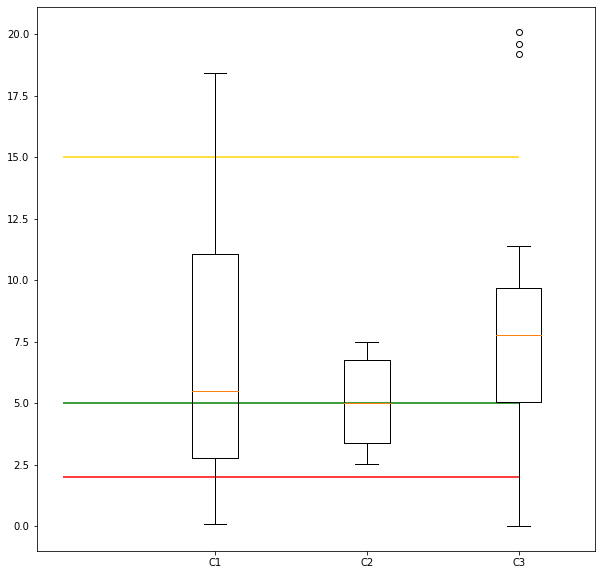

In [3]:
#c)

#Se importa librería para poder graficar
import matplotlib.pyplot as plt

#Se redimensiona el gráfico para que se vea mejor
fig = plt.figure(figsize=(10,10))

#Se preparan los boxplot con la muestras C1, C2 y C3
plt.boxplot([muestraC1[0], muestraC2[0], muestraC3[0]])

#Se agregan los rótulos correspondientes
plt.xticks([1,2, 3],["C1", "C2", "C3"])

#Se dibujan las líneas y1 = 2, y2 = 5, y3 = 15, para separar los datos inaceptables, aceptables y excelentes
plt.hlines(2, 0, 3, label="Inaceptable", colors='r')
plt.hlines(5, 0, 3, label="Aceptable", colors='g')
plt.hlines(15, 0, 3, label="Excelente", colors='gold')

plt.show()


#¿Existe evidencia suficiente para concluir que la condición  𝐶3  es mejor que las otras dos condiciones?
#C1 tiene datos muy extremos (outliers) y parte de su distribución está cercana a un desempeño inaceptable. Por su parte C2 posee una buena distribución
#de datos, y pocos valores extremos, pero su desempeño se mantiene en lo aceptable. En cambio C3, tiene una buena distribución en la muestra, toda su caja está sobre el nivel 
#aceptable y menos sobrepuesta que el resto, incluso en sus valores más bajos, por lo que se puede concluir que es mejor que las otras dos condiciones

#¿Qué se puede comentar al respecto de las condiciones?
#En general con las 3 condiciones podemos observar que rondan los parametros aceptables de desempeño, sin embargo las cajas C1 y C2 están sobrepuestas, por lo
#que se observa una diferencia menos significativa en los resultados

In [4]:
#d)

#Defino las funciones varianza_muestral y desviacion_muestral modificadas
def varianza_muestral(b, datos):
    n = len(datos)
    suma = 0.0
    for dato in datos:
        suma += (dato-b)**2
    return suma/(n-1)

def desviacion_muestral(b, datos):
    return varianza_muestral(b, datos)**(0.5)

#b1 = media_muestral
b1_C1 = round(float(desviacion_muestral(mediaC1, muestraC1[0])),4)
b1_C2 = round(float(desviacion_muestral(mediaC2, muestraC2[0])),4)
b1_C3 = round(float(desviacion_muestral(mediaC3, muestraC3[0])),4)

#b2 = mediana_muestral
b2_C1 = round(float(desviacion_muestral(medianaC1, muestraC1[0])),4)
b2_C2 = round(float(desviacion_muestral(medianaC2, muestraC2[0])),4)
b2_C3 = round(float(desviacion_muestral(medianaC3, muestraC3[0])),4)

#b3 = 5 (criterio aceptable)
b3_C1 = round(float(desviacion_muestral(5, muestraC1[0])),4)
b3_C2 = round(float(desviacion_muestral(5, muestraC2[0])),4)
b3_C3 = round(float(desviacion_muestral(5, muestraC3[0])),4)


print("b1 = media_muestral")
print(f"La dispersión de la muestra C1 es {b1_C1}")
print(f"La dispersión de la muestra C2 es {b1_C2}")
print(f"La dispersión de la muestra C3 es {b1_C3}\n")

print("b2 = mediana_muestral")
print(f"La dispersión de la muestra C1 es {b2_C1}")
print(f"La dispersión de la muestra C2 es {b2_C2}")
print(f"La dispersión de la muestra C3 es {b2_C3}\n")

print("b3 = 5 (criterio aceptable)")
print(f"La dispersión de la muestra C1 es {b3_C1}")
print(f"La dispersión de la muestra C2 es {b3_C2}")
print(f"La dispersión de la muestra C3 es {b3_C3}")


#¿Qué indica lo observado? Compare con lo analizado en c)
#La información presentada complementa lo observado en los boxplots, ya que la dispersión en C2 resulta ser la menor en los 3 casos, y se debe
#principalmente a la distribución centrada de sus valores, en comparación con C1 y C3. Bajo esa misma línea, C1 obtuvo la mayor dispersión, lo que significa que
#no hay una buena distribución, al tener datos muy alejados entre sí. Para C3, los resultados no son tan bajos como en C2, pero no alcanzan los niveles de C1,
#lo que se traduce en resultados más alejados unos de otros en cuanto a desempeño, pero no tan alejados como los obtenidos bajo la primera condición

b1 = media_muestral
La dispersión de la muestra C1 es 5.2703
La dispersión de la muestra C2 es 1.7786
La dispersión de la muestra C3 es 3.5485

b2 = mediana_muestral
La dispersión de la muestra C1 es 5.5365
La dispersión de la muestra C2 es 1.7787
La dispersión de la muestra C3 es 3.5707

b3 = 5 (criterio aceptable)
La dispersión de la muestra C1 es 5.704
La dispersión de la muestra C2 es 1.7787
La dispersión de la muestra C3 es 4.2665


In [5]:
#e) 
#En base a todo lo señalado anteriormente, recomendaría la condición número 3, ya que presenta buena distribución de los datos, tanto los mejores resultados como los más
#bajos en esa condición están sobre lo aceptable y su caja presenta una diferencia más significativa con respecto a C2 y C1

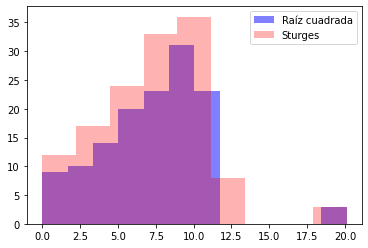

In [6]:
#f)

#Importo las librerias necesarias
from math import ceil, sqrt, log2

#Calculo lo solicitado
N3 = muestraC3.shape[0]

#Muestra C3
#K1 = Raíz cuadrada
plt.hist(muestraC3[0], bins=ceil(sqrt(N3)), alpha=0.5, label="Raíz cuadrada", color='b')
#K2 = Sturges
plt.hist(muestraC3[0], bins=ceil(log2(N3))+1, alpha=0.3, label="Sturges", color='r')

plt.legend()
plt.show()

In [7]:
#g)
#Significa que a una cantidad de pruebas menores los resultados son aceptables, pero luego de ese límite el desempeño difiere notablemente, lo que no da certeza
#de ser una condición segura. Sus medidas de tendencia bajarán y pasará a tener un desempeño inaceptable, por lo que el análisis realizado actualmente no
#tendrá sentido





